## https://scikit-learn.org/stable/user_guide.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
dataset = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/PozisyonSeviyeMaas.csv")

# Veri Keşfi

In [7]:
dataset.head()

Pozisyon  Seviye    Maas
0   Business Analyst       1   45000
1  Junior Consultant       2   50000
2  Senior Consultant       3   60000
3            Manager       4   80000
4    Country Manager       5  110000

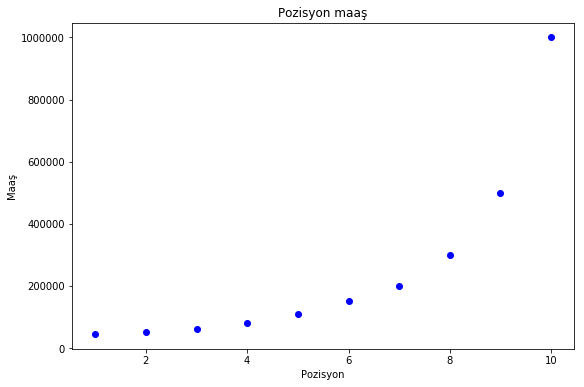

In [8]:
plt.figure(figsize=(9,6))
plt.scatter(dataset['Seviye'], dataset['Maas'], color='blue')
plt.title("Pozisyon maaş")
plt.xlabel("Pozisyon")
plt.ylabel("Maaş")
plt.show()

# Veri setini X ve y olarak ayırma (Dikey bölme)

In [9]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [10]:
print(X.shape)
print(y.shape)

(10, 1)
(10,)


# Polinom Regresyon için Ön Hazırlık

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [12]:
X_poly.shape

(10, 3)

In [13]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

# Polinom Lineer Regresyon ile Modeli Eğitmek

In [14]:
from sklearn.linear_model import LinearRegression
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Polinom Regresyon Modelin Grafiğini Çizmek

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Pozisyon&Maas Polinom Regresyon')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

# Tahmin Yapma

In [16]:
# Tahmin edilecek veri hazırlığı 
deger = 6.7
tahmin_edilecek_pozisyon = poly_reg.fit_transform(np.array(deger).reshape(-1, 1))

In [17]:
lin_reg_2.predict(tahmin_edilecek_pozisyon)

array([214223.86363636])